In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import librosa
import librosa.display

In [2]:
%cd AudioMNIST-using-PyTorch-master/

/content/AudioMNIST-using-PyTorch-master


In [4]:
%%time

tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

CPU times: user 128 µs, sys: 30 µs, total: 158 µs
Wall time: 164 µs


In [0]:
path = './MNIST'
# ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

In [7]:
data = (ImageList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(size=128)
        .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [14]:
data.

64

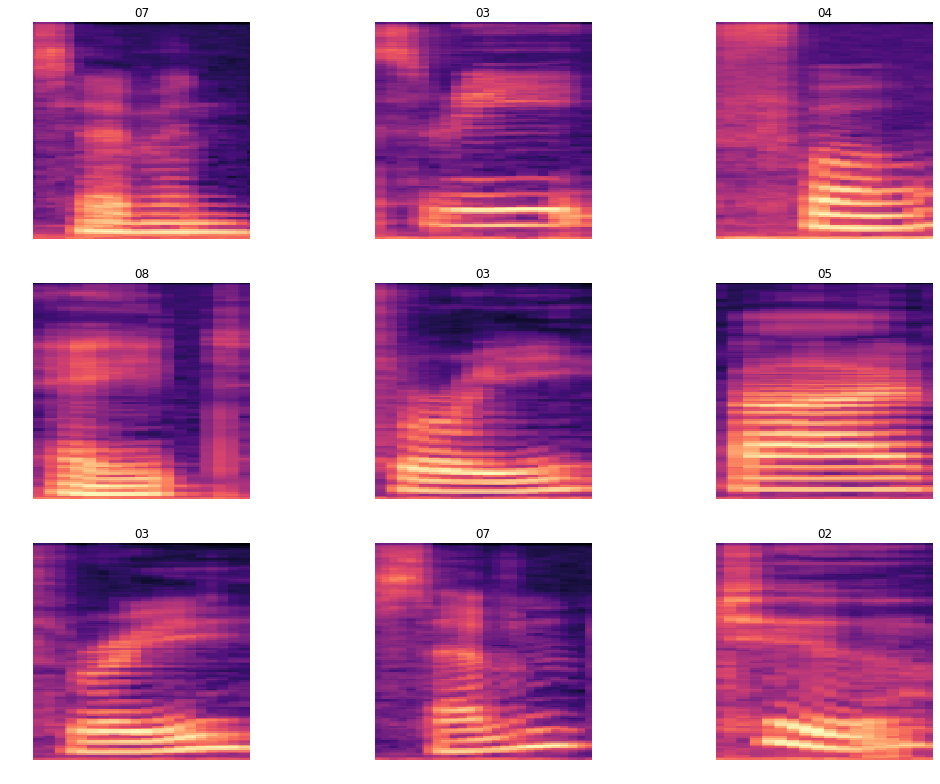

In [8]:
data.show_batch(rows=3, figsize=(15,11))

In [0]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


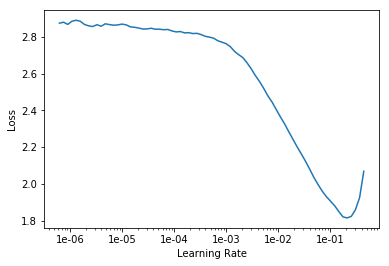

In [11]:
learn.recorder.plot()

In [17]:
lr = 1e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.278616,0.135449,0.955000,12:39
1,0.082191,0.043398,0.988500,12:38
2,0.037962,0.033367,0.992167,12:51
3,0.010301,0.015473,0.996000,12:44
4,0.006752,0.015725,0.996167,12:42


In [0]:
 learn.save('9961_audioMNIST')

In [0]:
predict = learn.predict(open_image('MNIST/01/1_01_1.png'))

In [29]:
str(predict[0])

'01'

(Category 07,
 tensor(7),
 tensor([2.6765e-13, 6.6047e-12, 4.2477e-13, 3.8875e-15, 2.1173e-12, 1.6493e-13,
         2.3899e-10, 1.0000e+00, 1.9892e-13, 8.5484e-13]))

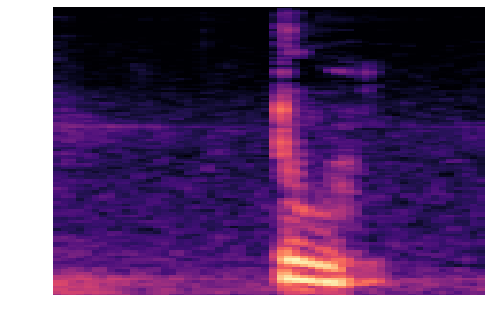

In [70]:
fig = plt.figure(frameon=False)
plt.ioff()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)    
y, sr = librosa.load('./../download.mp3')
data = librosa.feature.melspectrogram(y=y, sr=sr)
learn.predict(fig.show(librosa.display.specshow(librosa.power_to_db(data,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')))

In [0]:
from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file("./../Record (online-voice-recorder.com).mp3", format="mp3")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

In [67]:
duration

1358

In [68]:
trimmed_sound

In [50]:
librosa.load(trimmed_sound)

TypeError: ignored

In [0]:
!pip install pyaudio

In [0]:
librosa.load()